# Projeto-Lello Imóveis


# Análise do preço de aparmentos São paulo pelo site lello Imóveis 


Alunos:

<li>Gabriel de Araújo Alves 
<li>André Lima
<li>Enzo Rodrigues



# 1. Introdução

## 1.1 Como verificar o preço?

<ul>Sabemos que o setor imobiliário é um setor muito procurado ao longo dos anos e atualmente.Por isso, primeiro é necessário, a partir do site do quinto andar, e,considerando apartamentos da cidade de São Paulo, podemos traçar uma estimativa de preços médios de apartamentos ou casas considerando alguns fatores como:<ul/>
        <li> Área da casa ou apartamento
        <li> Número de quartos 
        <li> Bairro
        <li> rua  

## 1.2 Importando Bibliotecas necessárias

In [1]:

%matplotlib inline
import math
import os
import seaborn as sns
import matplotlib as plt
import numpy as np
from numpy import arange
import pandas as pd
from random import randint
# Remove warnings
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML  # Para ter melhor print.
from math import *
# para nos comunicarmos com a Web
import requests

# para extrair informações de páginas HTML
import bs4
from bs4 import BeautifulSoup


# Modelos preditivos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Módulos complementares para os modelos preditivos
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

import time

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

## 1.3 Extração de Dados

## 1.3.1 Definindo cabeçalho User-Agent

In [2]:
headers = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'})

## 1.3.2 Definindo Url de Busca

In [3]:
url = 'https://www.lelloimoveis.com.br/venda/residencial/1-pagina/'

## 1.3.3 Utilizando *requests* para baixar a página do Lello Imóveis

Com o uso da biblioteca **requests**, podemos obter o **HTML** das páginas da LelloImóveis.

In [4]:
url = 'https://www.lelloimoveis.com.br/venda/residencial/1-pagina/'#considerando só a primeira página
resposta = requests.get(url = url, headers=headers)
resposta.json

resposta.encoding = 'utf-8'

# resposta.text

## 1.3.4 Extraindo informações relevantes com *BeautifulSoup*

Perceba que o HTML inclui uma grande quantidade de tags, o que dificulta identificar informações relevantes de forma direta. Com o auxílio da biblioteca **BeautifulSoup** podemos extrair facilmente as informações que desejamos.

In [5]:
soup = BeautifulSoup(resposta.text, 'html.parser')

## 1.3.5 Utilizando *requests* para baixar a página do LelloImóveis

Com o uso da biblioteca **requests**, podemos obter o **HTML** da página do Quinto Andar.

In [6]:
# url ='https://www.lelloimoveis.com.br/venda/residencial/1-pagina/'
resposta = requests.get(url = url, headers=headers)
resposta.encoding = 'utf-8'
soup = BeautifulSoup(resposta.content, 'html.parser')

# 1.3.6-Considerando apenas a 1° página como exemplo

In [7]:
url = 'https://www.lelloimoveis.com.br/venda/residencial/1-pagina/'
resposta = requests.get(url = url, headers=headers)

ap = "card-body"  # Há no total 24 objetos com essa classe, mas os 12 primeiros são idênticos aos 12 últimos


lista_total = []
lista_aps = soup.find_all(class_=ap, limit=12)
lista_total.append(lista_aps)
print(len(lista_total)) #lista_total tem uma lista com os 12 elementos

1


# 1.3.7-Pegando todas as páginas de apartamentos

In [9]:
lista_total = []
for i in range(1,100):
    url = 'https://www.lelloimoveis.com.br/venda/residencial/{}-pagina/'.format(i)
    resposta = requests.get(url = url, headers=headers)
    soup = BeautifulSoup(resposta.content, 'html.parser')
    lista_aps = soup.find_all(class_=ap, limit=12)
    lista_total.append(lista_aps)

In [10]:
#list_comprehension para todos os elementos(apartamentos da lista de páginas)
flat_list = [item for sublist in lista_total for item in sublist]  # todos os elementos encontrados individualmente


# 1.3.8-Função para criação de dataFrame com informações relevantes e limpeza de dados

In [11]:
def data(lista):
    #listas necessárias
    lista_tipo=[]
    lista_rua=[]
    lista_bairro=[]
    lista_area=[]
    lista_quartos=[]
    lista_vagas=[]
    lista_banheiros=[]
    lista_aluguel_total=[]
    


    for i in range(0, len(lista)):
        ap = lista[i] #procura cada lista de apartamentos
        #tipo do ap
        tipo=ap.find('div',attrs={'class': "card-title h5"}).text
        lista_tipo.append(tipo)
        #rua
        rua=ap.find('p',attrs={'class': "text-truncate mb-0"}).text
        lista_rua.append(rua)
        #bairro
        bairro=ap.find('span',attrs={'class': "card-text-neighborhood mt-1 text-truncate"}).text.split(',')[0]
        lista_bairro.append(bairro)
        #area do ap
        area=ap.find('span',attrs={'class': "tagItemstyle__TagValue-sc-13sggff-3 edPntf"})
        if area==None:
            area=0
        else:
            area=int(ap.find('span',attrs={'class': "tagItemstyle__TagValue-sc-13sggff-3 edPntf"}).text.split("m²")[0])
        lista_area.append(area)
        
        #numero de quartos
        quartos=ap.find('span',attrs={'class': "tagItemstyle__ComplementValue-sc-13sggff-4 hERajv ml-0"})
        if quartos==None:
            quartos=0            
        else:
            quartos=int(ap.find('span',attrs={'class': "tagItemstyle__ComplementValue-sc-13sggff-4 hERajv ml-0"}).text.split(" ")[0])
        lista_quartos.append(quartos)
        #numero de vagas de carro
        vagas_carro=ap.find('span',attrs={'data-testid': "realty-parking-lot-quantity"})
        if vagas_carro==None:
            vagas_carro=0
        else:
            vagas_carro=int(ap.find('span',attrs={'data-testid': "realty-parking-lot-quantity"}).text.split("Garagens")[0])
        lista_vagas.append(vagas_carro)
        
        #numero de banheiros
        banheiros=ap.find('span',attrs={'data-testid':"realty-bathroom-quantity"})
        if banheiros==None:
            banheiros=0
        else:                
            banheiros=int(ap.find('span',attrs={'data-testid':"realty-bathroom-quantity"}).text.split("Banheiros")[0])
        lista_banheiros.append(banheiros)
        #valor do aluguel
        aluguel=ap.find('p',attrs={'class':"mb-0 font-weight-bold"})
        if aluguel==None:
            aluguel=0
        else:
            aluguel=int(ap.find('p',attrs={'class':"mb-0 font-weight-bold"}).text.split("R$")[1].replace(",",""))
        lista_aluguel_total.append(aluguel)
    
    df = pd.DataFrame({'Tipo': lista_tipo,
                   'Rua': lista_rua,
                   'Bairro': lista_bairro,
                   'Área': lista_area,
                   'Quartos':lista_quartos,
                    'Vagas':lista_vagas,
                    'Banheiros':lista_banheiros,
                   'Preço de Venda':lista_aluguel_total
                  })
        
    return df


# 1.3.9 Criando Dataframe com dados limpos

In [14]:
flat_list = [item for sublist in lista_total for item in sublist]  # todos os elementos encontrados individualmente
frame=data(flat_list)
frame

,Tipo,Rua,Bairro,Área,Quartos,Vagas,Banheiros,Preço de Venda
0,Apartamento,Rua dos Capitães Mores,Mooca,87,3,2,2,620000
1,Apartamento,Rua Dias Leme,Mooca,79,2,1,1,560000
2,Apartamento,Rua do Orfanato,Vila Prudente,59,2,1,1,460000
3,Apartamento,Rua Álvares de Azevedo,Centro,133,3,1,2,550000
4,Apartamento,Rua Dianópolis,Parque da Mooca,43,2,1,1,320000
...,...,...,...,...,...,...,...,...
1183,Apartamento,Rua Alves de Almeida,Chácara Belenzinho,49,2,1,2,383000
1184,Apartamento,Rua PIRACICABA,Vila Valparaíso,64,3,2,1,340000
1185,Apartamento,Rua George Chahestian,Vila Basileia,52,2,1,1,320000
1186,Apartamento,Rua Demini,Penha de França,50,2,1,0,350000


### 1.4 -Rodando a base de dados trazida do excel(refazer essa parte)

In [13]:

# import pandas as pd
# new_frame=pd.read_excel("Database-LelloImoveis.xlsx")
# new_frame=new_frame.drop(['Unnamed: 0'], axis=1)
# # new_frame=new_frame.drop(columns=new_frame['Unnamed:0'],axis=1)
# new_frame

# 2 Análise de Dados

### 2.1 Verificação de Dados nulos na base

<AxesSubplot:>

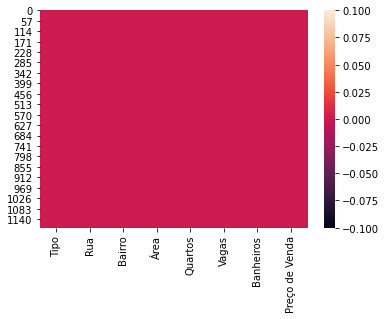

In [15]:
#utilização do heatmap para verificar dados nulos
sns.heatmap(frame.isnull())

### 2.2-Análise prévia das variáveis numéricas

In [16]:
frame.describe()

,Área,Quartos,Vagas,Banheiros,Preço de Venda
count,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
mean,74.452862,2.295455,1.141414,1.449495,511011.319024
std,26.197364,0.624746,0.546292,0.606042,203298.237394
min,20.000000,0.000000,0.000000,0.000000,300000.000000
25%,57.000000,2.000000,1.000000,1.000000,365000.000000
50%,68.000000,2.000000,1.000000,1.000000,430000.000000
75%,87.000000,3.000000,1.000000,2.000000,587000.000000
max,260.000000,4.000000,3.000000,4.000000,999000.000000
